In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [55]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = train_images / 255.0
test_images = test_images / 255.0

def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

encoded_train_labels = encode(train_labels)
encoded_test_labels = encode(test_labels)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Shape of data (BEFORE encode): (60000,)
Shape of data (AFTER  encode): (60000, 10)

Shape of data (BEFORE encode): (10000,)
Shape of data (AFTER  encode): (10000, 10)



In [ ]:
labels = np.zeros((10,60000), dtype=int)
for i in range(len(train_labels)):
    labels[train_labels[i],i] = 1

labels2 = np.zeros((10,len(test_labels)), dtype=int)
for i in range(len(test_labels)):
    labels2[test_labels[i],i] = 1
    
print(labels)
print(train_labels[1])

def make_labels(i,labels):
    new_labels = np.zeros((len(labels),10), dtype=int)
    for l in range(len(labels)):
        new_labels[l,i] = labels[l]
    return new_labels

i = 0
t_labels = make_labels(i,labels[i])
te_labels = make_labels(i,labels2[i])
print(len(t_labels))
print(len(te_labels))

In [122]:
te_print = np.zeros((len(test_labels)), dtype=int)
print(te_print)
for l in range(len(test_labels)):
    if test_labels[l] == 0:
        te_print[l]=1
                

[0 0 0 ... 0 0 0]


980

In [102]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(10, activation='hard_sigmoid'))
model.add(Dense(10, activation='hard_sigmoid'))
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

## hardsigmoid:
0 if x < -2.5
1 if x > 2.5
0.2 * x + 0.5 if -2.5 <= x <= 2.5.

In [108]:
history = model.fit(train_images[:1000], t_labels[:1000], epochs=50, validation_data=(test_images, te_labels))

Train on 1000 samples, validate on 10000 samples
Epoch 1/50
1000/1000 [==============================] - 0s 209us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9716
Epoch 2/50
1000/1000 [==============================] - 0s 196us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9715
Epoch 3/50
1000/1000 [==============================] - 0s 195us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9715
Epoch 4/50
1000/1000 [==============================] - 0s 201us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9715
Epoch 5/50
1000/1000 [==============================] - 0s 197us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9715
Epoch 6/50
1000/1000 [==============================] - 0s 181us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9715
Epoch 7/50
1000/1000 [==============================] - 0s 200us/step - loss: 0.0028 - acc: 0.9770 - val_loss: 0.0028 - val_acc: 0.9715

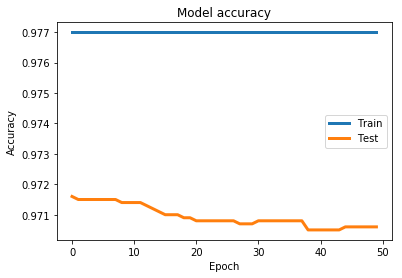

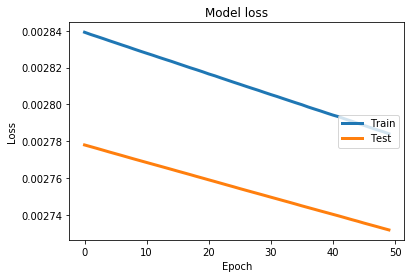

In [109]:
plt.figure()
plt.plot(history.history['acc'], linewidth=3.0)
plt.plot(history.history['val_acc'], linewidth=3.0)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')

plt.figure()
plt.plot(history.history['loss'], linewidth=3.0)
plt.plot(history.history['val_loss'], linewidth=3.0)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='center right')

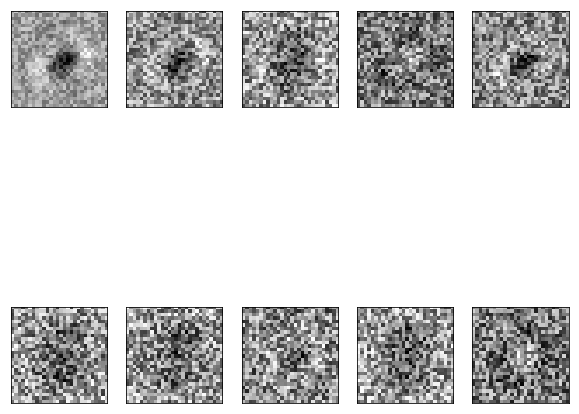

In [110]:
weights = model.get_weights()
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(weights[0][:, i].reshape((28, 28)), cmap=plt.cm.binary)

In [97]:
predictions = model.predict(test_images)
print(predictions.shape)

(10000, 10)


In [91]:
def plot_image(i, predictions_array, true_label, img):
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                         100*np.max(predictions_array),
                                         true_label),
               color=color)

def plot_value_array(i, predictions_array, true_label):
    
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

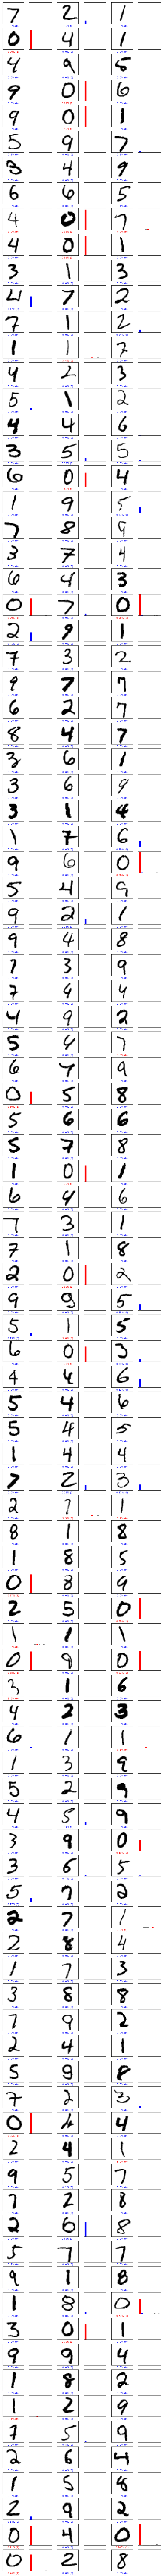

In [124]:
num_rows = 100
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, te_print, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, te_print)
